In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import pandas as pd

from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shumpu\Anaconda2\envs\p36\lib\si

In [2]:
dataset_loc = 'datasets/ionosphere/ionosphere.data'

# cols = ['Elevation', 'Aspect', 'Slope', 'Hor2Hydro', 'Ver2Hydro', 'Hor2Road', 'Hillshade_9am', 'Hillshade_Noon',
#         'Hillshade_3pm', 'Hor2FirePt']

# for f in range(0, 4):
#     cols.append('Wilderness_Area_{}'.format(f))
    
# for f in range(0, 40):
#     cols.append('Soil_Type_%d'%f)

# cols.append("Cover_Type")
cols = []
for f in range(34):
    cols.append("att_%d"%f)

cols.append("class")
    
df = pd.read_csv(dataset_loc, sep=',', names=cols)
df.head()

,att_0,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,...,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
# pd.set_option('display.max_columns', 55)

# for f in range(0, 40):
#     df['Soil_Type_%d'%f] = StandardScaler().fit_transform(df['Soil_Type_%d'%f].values.reshape(-1, 1))

# df['Elevation'] = StandardScaler().fit_transform(df['Elevation'].values.reshape(-1, 1))
# df['Aspect'] = StandardScaler().fit_transform(df['Aspect'].values.reshape(-1, 1))
# df['Hor2Hydro'] = StandardScaler().fit_transform(df['Hor2Hydro'].values.reshape(-1, 1))
# df['Ver2Hydro'] = StandardScaler().fit_transform(df['Ver2Hydro'].values.reshape(-1, 1))
# df['Hor2Road'] = StandardScaler().fit_transform(df['Hor2Road'].values.reshape(-1, 1))
# df['Hor2FirePt'] = StandardScaler().fit_transform(df['Hor2FirePt'].values.reshape(-1, 1))
# df['Hillshade_9am'] = StandardScaler().fit_transform(df['Hillshade_9am'].values.reshape(-1, 1))
# df['Hillshade_Noon'] = StandardScaler().fit_transform(df['Hillshade_Noon'].values.reshape(-1, 1))
# df['Hillshade_3pm'] = StandardScaler().fit_transform(df['Hillshade_3pm'].values.reshape(-1, 1))

# df.tail()

In [4]:
#10 non categorical and considered class 4 as anomaly and class 2 as normal.

#class 2 only has 2747 points while class 4 has 283301 points.

normal = df[df['class'] == 'g']
anomalies = df[df['class'] == 'b']

normal.loc[normal['class'] == 'g', 'class'] = 0
anomalies.loc[anomalies['class'] == 'b', 'class'] = 1

anomalies.shape, normal.shape

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


((126, 35), (225, 35))

In [5]:
normal.head()

,att_0,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,...,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,0
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,0


In [6]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = normal[:10000]
# data_set = pd.concat([normal[:100000], anomalies])

x_train, x_test = train_test_split(data_set, test_size = 0.4, random_state = 42)

# x_train = x_train.sort_values(by=['Time'])
# x_test = x_test.sort_values(by=['Time'])

y_train = x_train["class"]
y_test = x_test["class"]

#normal is 0
#anomaly is 1


        
        
x_train = x_train.drop("class", axis=1)
x_test = x_test.drop("class", axis=1)

x_train.head(10)

,att_0,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,...,att_24,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33
340,1,0,0.19466,0.05725,0.04198,0.25191,-0.10557,0.48866,-0.18321,-0.18321,...,0.21645,0.24692,0.03913,0.31092,-0.03817,0.26336,-0.16794,0.16794,-0.30153,-0.33588
121,1,0,1.00000,-0.92453,1.00000,0.75472,0.49057,-0.05660,0.62264,0.00000,...,1.00000,0.79245,0.92192,-0.00128,0.94340,-1.00000,1.00000,0.43396,0.43396,-0.11321
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
189,1,0,1.00000,0.06843,1.00000,0.14211,1.00000,0.22108,1.00000,-0.12500,...,1.00000,1.00000,1.00000,1.00000,1.00000,0.25000,1.00000,1.00000,1.00000,1.00000
48,1,0,0.98166,0.00874,0.98103,-0.03818,0.97565,-0.05699,0.95947,-0.06971,...,0.88487,-0.19689,0.81813,-0.21136,0.78546,-0.23864,0.76911,-0.23095,0.74323,-0.23902
314,1,0,0.79378,0.29492,0.64064,0.52312,0.41319,0.68158,0.14177,0.83548,...,-0.17437,-0.52540,0.01523,-0.48707,0.19030,-0.38059,0.31008,-0.23199,0.34572,-0.08036
289,1,0,0.74916,0.02549,0.98994,0.09792,0.75855,0.12877,0.74313,-0.09188,...,0.71764,-0.01207,0.82271,0.02552,0.72435,-0.01073,0.90409,0.11066,0.72837,0.02750
272,1,0,0.63510,-0.04388,0.76530,0.02968,0.61432,0.36028,0.65358,-0.00462,...,0.64665,0.23095,0.68775,0.17704,0.61663,0.07621,0.66316,0.19841,0.69053,0.36721
290,1,0,0.47337,0.19527,0.06213,-0.18343,0.62316,0.01006,0.45562,-0.04438,...,0.47929,-0.02367,0.46514,0.03259,0.53550,0.25148,0.31953,-0.14497,0.34615,-0.00296
281,1,0,0.94331,0.19959,0.96132,0.40803,0.80514,0.56569,0.56687,0.70830,...,-0.68851,0.30912,-0.77097,0.15619,-0.75406,-0.04399,-0.75199,-0.17921,-0.66932,-0.34367


In [7]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(135, 34)
y_train:(135,)

x_test:(90, 34)
y_test:(90,)



In [8]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1])
input_shape = (x_train.shape[1])

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [9]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(135, 34)
y_train:(135,)

x_test:(90, 34)
y_test:(90,)

input_shape:34



In [10]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [95]:
logfilename = "variationalautoencoder"


original_dim  = x_train.shape[1]

print(original_dim)

input_shape = (original_dim,)
intermediate_dim1 = 16
intermediate_dim2 = 8
batch_size = 24
latent_dim = 4
epochs = 200


# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim1, activation='relu')(inputs)
x = Dense(intermediate_dim2, activation='relu')(x)

z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')

x = Dense(intermediate_dim2, activation='relu')(latent_inputs)
x = Dense(intermediate_dim1, activation='relu')(x)
outputs = Dense(original_dim, activation='linear')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')


# VAE loss = mse_loss or xent_loss + kl_loss
reconstruction_loss = mse(inputs, outputs)

reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.005
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

34
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
encoder_input (InputLayer)       (None, 34)            0                                            
____________________________________________________________________________________________________
dense_31 (Dense)                 (None, 16)            560         encoder_input[0][0]              
____________________________________________________________________________________________________
dense_32 (Dense)                 (None, 8)             136         dense_31[0][0]                   
____________________________________________________________________________________________________
z_mean (Dense)                   (None, 4)             36          dense_32[0][0]                   
________________________________________________________________________________________

In [96]:


vae.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['accuracy'])
vae.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 34)                0         
_________________________________________________________________
encoder (Model)              [(None, 4), (None, 4), (N 768       
_________________________________________________________________
decoder (Model)              (None, 34)                762       
Total params: 1,530
Trainable params: 1,530
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = vae.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    callbacks=[TensorBoard(log_dir='../logs/{0}'.format(logfilename))])

Train on 135 samples, validate on 90 samples
Epoch 1/200
135/135 [==============================] - 0s - loss: 12.5515 - acc: 0.0741 - val_loss: 13.8363 - val_acc: 0.1222
Epoch 2/200
135/135 [==============================] - 0s - loss: 12.1603 - acc: 0.1481 - val_loss: 12.9149 - val_acc: 0.0333
Epoch 3/200
135/135 [==============================] - 0s - loss: 11.6480 - acc: 0.0889 - val_loss: 12.8005 - val_acc: 0.0889
Epoch 4/200
135/135 [==============================] - 0s - loss: 11.2656 - acc: 0.0593 - val_loss: 12.3443 - val_acc: 0.0778
Epoch 5/200
135/135 [==============================] - 0s - loss: 10.9052 - acc: 0.0519 - val_loss: 12.0231 - val_acc: 0.0444
Epoch 6/200
135/135 [==============================] - 0s - loss: 10.5367 - acc: 0.0889 - val_loss: 11.7052 - val_acc: 0.1111
Epoch 7/200
135/135 [==============================] - 0s - loss: 10.2003 - acc: 0.0815 - val_loss: 11.2729 - val_acc: 0.0778
Epoch 8/200
135/135 [==============================] - 0s - loss: 9.9310 

135/135 [==============================] - 0s - loss: 1.7642 - acc: 0.9407 - val_loss: 2.2177 - val_acc: 0.9000
Epoch 67/200
135/135 [==============================] - 0s - loss: 1.7215 - acc: 0.9407 - val_loss: 2.1816 - val_acc: 0.9222
Epoch 68/200
135/135 [==============================] - 0s - loss: 1.6873 - acc: 0.9481 - val_loss: 2.1366 - val_acc: 0.9111
Epoch 69/200
135/135 [==============================] - 0s - loss: 1.6484 - acc: 0.9037 - val_loss: 2.1098 - val_acc: 0.8889
Epoch 70/200
135/135 [==============================] - 0s - loss: 1.6254 - acc: 0.9185 - val_loss: 2.0449 - val_acc: 0.9111
Epoch 71/200
135/135 [==============================] - 0s - loss: 1.5925 - acc: 0.9259 - val_loss: 2.0142 - val_acc: 0.9000
Epoch 72/200
135/135 [==============================] - 0s - loss: 1.5798 - acc: 0.9407 - val_loss: 1.9357 - val_acc: 0.8889
Epoch 73/200
135/135 [==============================] - 0s - loss: 1.5488 - acc: 0.9185 - val_loss: 1.8904 - val_acc: 0.8889
Epoch 74/200


135/135 [==============================] - 0s - loss: 0.7784 - acc: 0.9852 - val_loss: 0.8788 - val_acc: 0.9222
Epoch 132/200
135/135 [==============================] - 0s - loss: 0.7857 - acc: 0.9926 - val_loss: 0.8719 - val_acc: 0.9222
Epoch 133/200
135/135 [==============================] - 0s - loss: 0.7738 - acc: 0.9852 - val_loss: 0.8992 - val_acc: 0.9333
Epoch 134/200
135/135 [==============================] - 0s - loss: 0.7764 - acc: 0.9926 - val_loss: 0.8802 - val_acc: 0.9222
Epoch 135/200
135/135 [==============================] - 0s - loss: 0.7595 - acc: 0.9778 - val_loss: 0.8623 - val_acc: 0.9444
Epoch 136/200
135/135 [==============================] - 0s - loss: 0.7587 - acc: 0.9926 - val_loss: 0.8785 - val_acc: 0.9333
Epoch 137/200
135/135 [==============================] - 0s - loss: 0.7664 - acc: 0.9926 - val_loss: 0.8689 - val_acc: 0.9444
Epoch 138/200
135/135 [==============================] - 0s - loss: 0.7661 - acc: 0.9778 - val_loss: 0.8673 - val_acc: 0.9333
Epoch 

135/135 [==============================] - 0s - loss: 0.6663 - acc: 0.9704 - val_loss: 0.7329 - val_acc: 0.8556
Epoch 197/200
135/135 [==============================] - 0s - loss: 0.6700 - acc: 0.9630 - val_loss: 0.7291 - val_acc: 0.8778
Epoch 198/200
135/135 [==============================] - 0s - loss: 0.6747 - acc: 0.9630 - val_loss: 0.7447 - val_acc: 0.8889
Epoch 199/200
135/135 [==============================] - 0s - loss: 0.6650 - acc: 0.9630 - val_loss: 0.7335 - val_acc: 0.9000
Epoch 200/200
135/135 [==============================] - 0s - loss: 0.6700 - acc: 0.9630 - val_loss: 0.7301 - val_acc: 0.8778


In [13]:
# y_test

In [98]:
predictions = vae.predict(x_test)

mse_error = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse_error,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,90.000000,90.0
mean,0.017203,0.0
std,0.022759,0.0
min,0.000985,0.0
25%,0.003932,0.0
50%,0.008678,0.0
75%,0.017796,0.0
max,0.104613,0.0


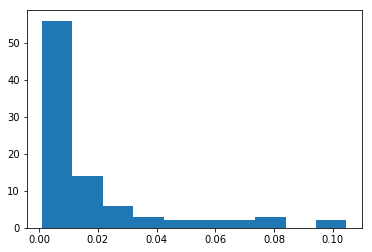

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [100]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


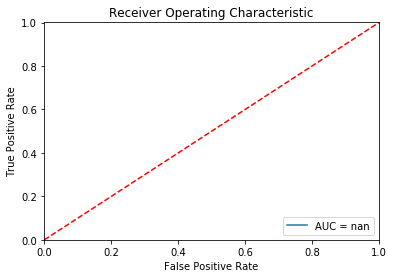

In [101]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [102]:
error_df.quantile(0.25)

reconstruction_error    0.003932
true_class              0.000000
Name: 0.25, dtype: float64

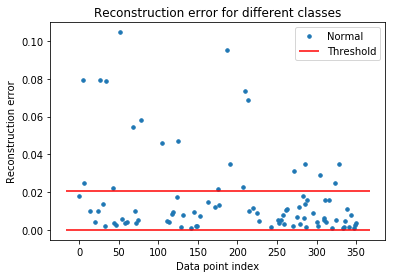

In [103]:
threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

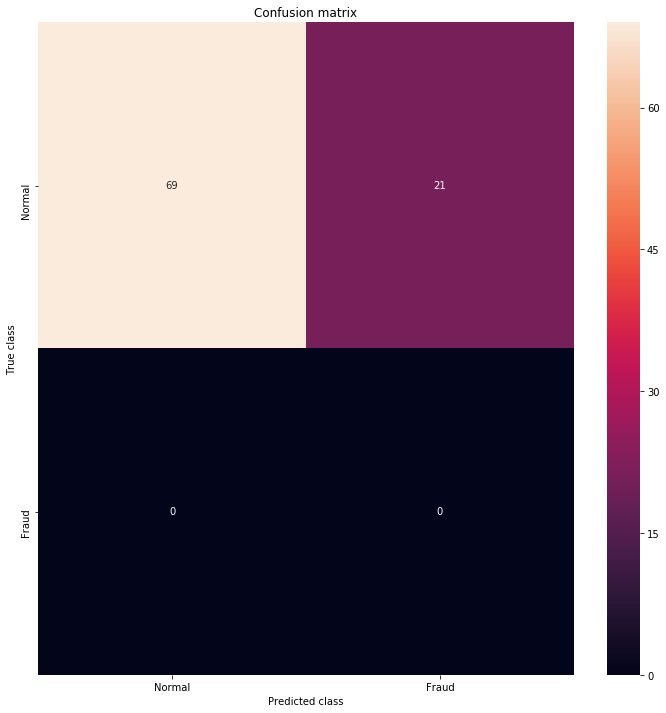

In [104]:
import seaborn as sns

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [105]:
counter = []

for f in range(0, len(error_df)):
    if error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [106]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, y_test)
print("AUC: {:.2%}".format (auc))

AUC: 50.00%


In [107]:
anom_class = anomalies['class']
anom = anomalies.drop('class', axis=1)

anom.head()

,att_0,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,...,att_24,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065


In [108]:
anom = np.array(anom)

In [109]:

anom_predictions = vae.predict(anom)

anom_mse = np.mean(np.power(anom - anom_predictions, 2), axis=1)
anom_error_df = pd.DataFrame({'reconstruction_error': anom_mse,
                        'true_class': anom_class})

anom_error_df.describe()

,reconstruction_error,true_class
count,126.000000,126.0
mean,0.349887,1.0
std,0.254677,0.0
min,0.006549,1.0
25%,0.122998,1.0
50%,0.336281,1.0
75%,0.532841,1.0
max,1.049705,1.0


In [110]:
threshold.reconstruction_error

0.020796121561785726

In [111]:
# print(np.array(anom_error_df.values[2][0]))

# for f in range(0, len(anom_error_df)):
#     print(np.array(anom_error_df.values[f][0]) > threshold)

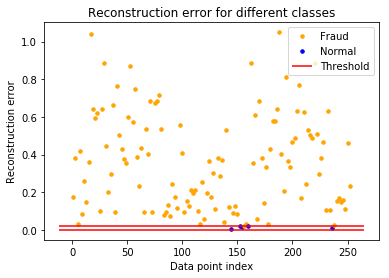

In [112]:
# threshold = threshold.reconstruction_error
groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()


for f in range(0, len(anom_error_df)):
    ax.plot(anom_error_df.index[f], anom_error_df.reconstruction_error.values[f], marker='o', ms=3.5, linestyle='',
           label="Fraud" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "Normal",
           color="orange" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "b")
    

    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)


plt.show();

In [113]:
counter = 0

for f in range(0, len(anom_error_df)):
    if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter = counter + 1
    
    
print("Accuracy: {}".format(counter / len(anom_error_df)))

Accuracy: 0.9603174603174603


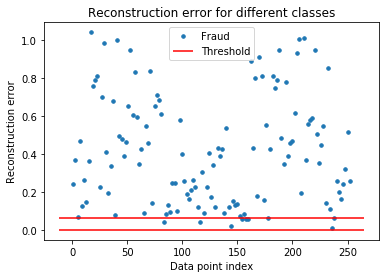

In [91]:

groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()



for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if ((group.reconstruction_error.values[name] > threshold.reconstruction_error)) else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [42]:
#### EVALUATION ON THE ENTIRE DF

In [43]:
points = np.array(df.drop('class', axis=1))
truths = df['class']

In [44]:
preds = vae.predict(points)

pred_mse = np.mean(np.power(points - preds, 2), axis=1)
pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': truths})

pred_error_df.describe()

,reconstruction_error
count,351.000000
mean,0.226994
std,0.238962
min,0.001297
25%,0.045362
50%,0.145435
75%,0.309261
max,1.083389


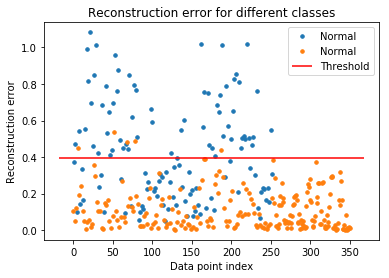

In [45]:
threshold = 1.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
groups = pred_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [46]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

In [47]:
counter = []

for f in range(0, len(pred_error_df)):
    if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [48]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, truths)
print("AUC: {:.2%}".format (auc))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Thoughts

Seems like TCN is more suited to high dimension datasets compared to VAE

